In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Importing data

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### About data & its cleansing

In [4]:
df2 = df.copy()

In [5]:
df2.shape

(205, 26)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [8]:
sum(df2.duplicated(subset=['car_ID'])) == 0

True

It implies that there is no duplicated rows in our dataset

In [9]:
df2.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

It implies there is no 'null' values in our dataset

### Preparing data for model training

In [10]:
cat_vals = df2.select_dtypes(include=['object']).columns
cat_vals

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [11]:
df2.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [12]:
df2['brand'] = df2.CarName.str.split(' ').str.get(0).str.lower()
df2.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
df2['brand'] = df2['brand'].replace(['vw', 'vokswagen'], 'volkswagen')
df2['brand'] = df2['brand'].replace(['maxda'], 'mazda')
df2['brand'] = df2['brand'].replace(['porcshce'], 'porsche')
df2['brand'] = df2['brand'].replace(['toyouta'], 'toyota')

df2.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
df2.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [15]:
cat_vals = df2.select_dtypes(include=['object']).columns
cat_vals

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'brand'],
      dtype='object')

In [16]:
for cat_val in cat_vals:
    print(f'Unique values of {cat_val}: ',df2[cat_val].unique())

Unique values of fueltype:  ['gas' 'diesel']
Unique values of aspiration:  ['std' 'turbo']
Unique values of doornumber:  ['two' 'four']
Unique values of carbody:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Unique values of drivewheel:  ['rwd' 'fwd' '4wd']
Unique values of enginelocation:  ['front' 'rear']
Unique values of enginetype:  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Unique values of cylindernumber:  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
Unique values of fuelsystem:  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Unique values of brand:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [17]:
len(df2.columns), len(cat_vals)

(24, 10)

Now there are 10 categorical varaibles & 14 numeric varaibles

In [18]:
df2.doornumber.replace(['two', 'four'], [2, 4], inplace=True)
df2.cylindernumber.replace(['two', 'three', 'four', 'five', 'six', 'eight', 'twelve'], [2,3,4,5,6,8,12], inplace=True)

In [19]:
print(df2.doornumber.dtype)
print(df2.cylindernumber.dtype)

int64
int64


In [20]:
df3 = pd.get_dummies(df2, drop_first=True)
df3.head()

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0
4,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 59 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   doornumber           205 non-null    int64  
 1   wheelbase            205 non-null    float64
 2   carlength            205 non-null    float64
 3   carwidth             205 non-null    float64
 4   carheight            205 non-null    float64
 5   curbweight           205 non-null    int64  
 6   cylindernumber       205 non-null    int64  
 7   enginesize           205 non-null    int64  
 8   boreratio            205 non-null    float64
 9   stroke               205 non-null    float64
 10  compressionratio     205 non-null    float64
 11  horsepower           205 non-null    int64  
 12  peakrpm              205 non-null    int64  
 13  citympg              205 non-null    int64  
 14  highwaympg           205 non-null    int64  
 15  price                205 non-null    flo

Whole dataset is converted into numeric type

In [22]:
df3.shape

(205, 59)

Now the data is fully prepared for use in model training

#### Main Objectives:
1. To find best model for prediction
2. How to see important features for outcome varaible 'y'
3. How to solve the 'overfitting' problem

### Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
X = df3.drop('price', axis=1)
y = df3.price.copy()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=58)
X_train.shape, X_test.shape

((143, 58), (62, 58))

1. Now we will train our model without scaling our dataset

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
r2 = r2_score(y_test, lr.predict(X_test))
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test)))
print('R2 score:', r2)
print('RMSE: ', rmse)

R2 score: 0.8768917629882423
RMSE:  2439.971501328129


2. Now we will train our model after scaling the dataset

In [27]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss = ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

lr = LinearRegression()
lr = lr.fit(X_train_sc, y_train)
r2 = r2_score(y_test, lr.predict(X_test_sc))
rmse = np.sqrt(mean_squared_error(y_test, lr.predict(X_test_sc)))
print('R2 score:', r2)
print('RMSE: ', rmse)

R2 score: 0.8768917629882377
RMSE:  2439.9715013281752


##### Conclusion:
This shows that scaling has no effect on Simple Linear Regression model

Text(0, 0.5, 'columns')

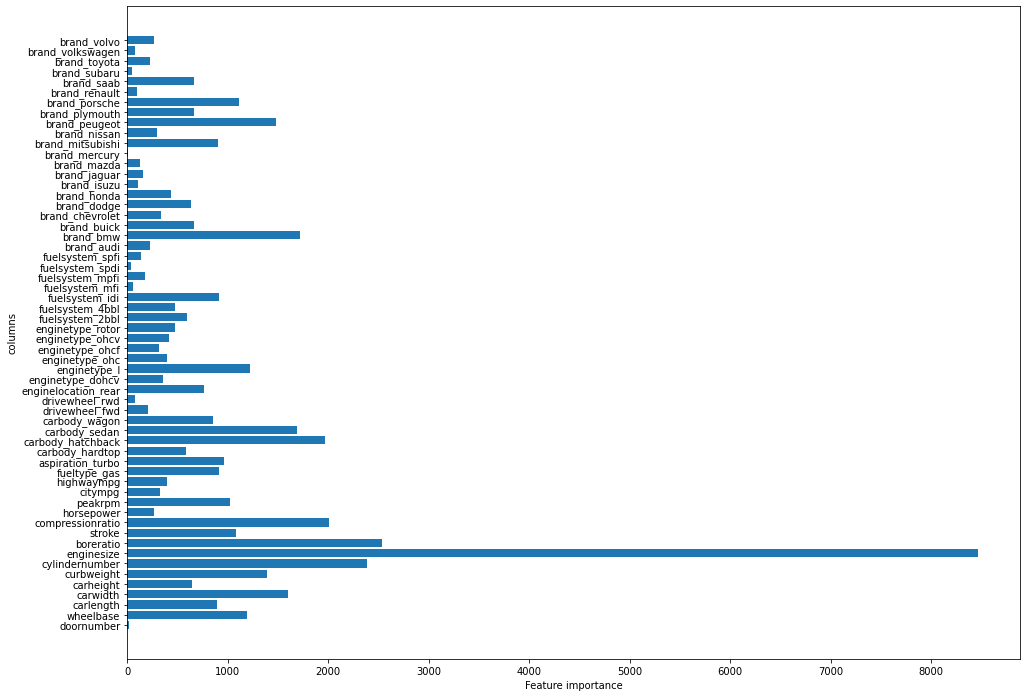

In [28]:
plt.figure(figsize = (16, 12))
plt.barh(X_train.columns, abs(lr.coef_))
plt.xlabel('Feature importance')
plt.ylabel("columns")

In [29]:
print("First 10 Important features for outcome variable 'y':")
pd.DataFrame(sorted(zip(abs(lr.coef_), X_train.columns), reverse=True))[1][:10]

First 10 Important features for outcome variable 'y':


0           enginesize
1            boreratio
2       cylindernumber
3     compressionratio
4    carbody_hatchback
5            brand_bmw
6        carbody_sedan
7             carwidth
8        brand_peugeot
9           curbweight
Name: 1, dtype: object

The above graph shows few important features for outcome varaible 'Price'

### Use of Regularization techniques(L2, L1) for reducing the overfitting 

In [30]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

#### L2 Regularization

In [31]:
alphas = [ 0.001, 0.05, 0.5, 1.0, 1.2, 1.5, 2.0]
r2 = []
for alpha in alphas:
    rd = Ridge(alpha=alpha)
    rd = rd.fit(X_train_sc, y_train)
    r2.append(r2_score(y_test, rd.predict(X_test_sc)))

In [32]:
r2

[0.8769691819630565,
 0.878059921875552,
 0.8495383224560512,
 0.8347083145948049,
 0.8320088942713157,
 0.8296665218869865,
 0.8282775205044303]

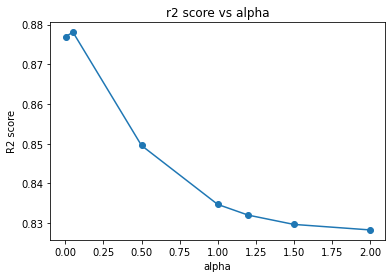

In [33]:
ax = plt.axes()
ax.plot(alphas, r2, marker = 'o')
ax.set(xlabel = 'alpha',
      ylabel='R2 score',
      title='r2 score vs alpha',
      )
plt.show()

Here best 'alpha' value for our model is 0.05. Now, let's build our Ridge model with a=0.05

In [34]:
rd = Ridge(alpha = 0.05)
rd = rd.fit(X_train_sc, y_train)

rmse = np.sqrt(mean_squared_error(y_test, rd.predict(X_test_sc)))
rd_r2_score = r2_score(y_test, rd.predict(X_test_sc))

print('RMSE: ', rmse)
print('R2 score: ', rd_r2_score)

RMSE:  2428.3676143342996
R2 score:  0.878059921875552


#### L1 Regularization

In [35]:
alphas = [ 0.5, 1.0, 1.2, 1.5, 2.0, 10]
r2 = []
for alpha in alphas:
    ls = Lasso(alpha=alpha)
    ls = ls.fit(X_train_sc, y_train)
    r2.append(r2_score(y_test, ls.predict(X_test_sc)))

In [36]:
r2

[0.8828494604956083,
 0.8820852163184568,
 0.8816594916511636,
 0.8813114768047153,
 0.8806715020067505,
 0.8540109601099153]

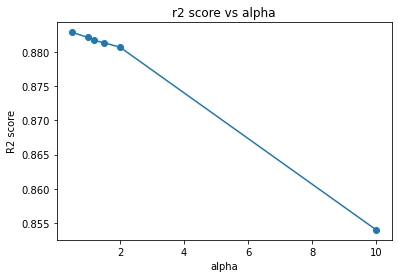

In [37]:
ax = plt.axes()
ax.plot(alphas, r2, marker = 'o')
ax.set(xlabel = 'alpha',
      ylabel='R2 score',
      title='r2 score vs alpha',
      )
plt.tick_params()
plt.show()

here best 'alpha' value for our model is '0.5'

In [38]:
ls = Lasso(alpha = 1.5)
ls = ls.fit(X_train_sc, y_train)

rmse = np.sqrt(mean_squared_error(y_test, ls.predict(X_test_sc)))
ls_r2_score = r2_score(y_test, ls.predict(X_test_sc))

print('RMSE: ', rmse)
print('R2 score: ', ls_r2_score)

RMSE:  2395.7724192352575
R2 score:  0.8813114768047153


In [39]:
sum(abs(ls.coef_) == 0)

3

In [40]:
rd.coef_

array([-2.91777426e+00,  1.16711740e+03, -8.40937491e+02,  1.56784795e+03,
       -6.07531232e+02,  1.34558027e+03, -1.92389195e+03,  7.92568193e+03,
       -2.24082679e+03, -1.05118647e+03, -1.82305636e+03, -9.53683039e+01,
        1.00952252e+03,  3.57227393e+02,  3.91762352e+02, -8.15810300e+02,
        9.45405011e+02, -5.71135481e+02, -1.92379731e+03, -1.65527001e+03,
       -8.33260788e+02, -2.23436643e+02,  1.82283879e+01,  7.74138122e+02,
        2.49485280e+02,  1.27147109e+03,  4.72949874e+02,  2.58332804e+02,
       -4.20661597e+02,  5.05617336e+02,  5.50186677e+02,  5.05617336e+02,
        8.15810300e+02, -6.65736994e+01,  1.31026204e+02,  2.92595036e+01,
        1.22409741e+02,  1.59426971e+02,  1.62164917e+03,  6.26949277e+02,
       -3.69711280e+02, -6.72499941e+02, -5.05574654e+02, -1.58314150e+02,
       -2.73513859e+02, -2.25820182e+02, -4.63391568e+01, -9.58584701e+02,
       -4.04670011e+02, -1.53367872e+03, -6.96254649e+02,  1.01150453e+03,
       -1.40026618e+02,  

In [41]:
sum(abs(rd.coef_) == 0)

0

##### Conclusion
This shows that L1 regularization does make some coefficients = 0. So, Lasso helps in feature selection

While in Case of Ridge Regression, coefficients tends to move towards 0.

### What to choose :    Ridge Reg. or Lasso Reg.
Why to choose when we can use Elastic net Regression. It combines the penalities of both lasso and ridge in its Cost Function

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    'alpha': [0.05, 0.5, 1.0, 1.5, 2],
    'l1_ratio': [ 0.1, 0.5, 1.0, 1.5]
}

In [44]:
en = ElasticNet()
gscv = GridSearchCV(en, param_grid=param_grid)
gscv.fit(X_train_sc, y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.05, 0.5, 1.0, 1.5, 2],
                         'l1_ratio': [0.1, 0.5, 1.0, 1.5]})

In [45]:
pd.DataFrame(gscv.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005592,0.001495,0.000849,0.000436,0.05,0.1,"{'alpha': 0.05, 'l1_ratio': 0.1}",0.904353,0.935844,0.862491,0.886385,0.942125,0.906239,0.029919,1
1,0.006878,0.000472,0.000726,0.000389,0.05,0.5,"{'alpha': 0.05, 'l1_ratio': 0.5}",0.901736,0.936824,0.863354,0.885381,0.925978,0.902654,0.026665,2
2,0.014753,0.000413,0.000805,0.000403,0.05,1.0,"{'alpha': 0.05, 'l1_ratio': 1.0}",0.883624,0.878846,0.859875,0.898299,0.892045,0.882538,0.013170,10
3,0.000598,0.000488,0.000000,0.000000,0.05,1.5,"{'alpha': 0.05, 'l1_ratio': 1.5}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
4,0.002789,0.000396,0.000598,0.000488,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",0.883655,0.927675,0.826683,0.886558,0.932422,0.891399,0.038133,7


In [46]:
gscv.best_params_

{'alpha': 0.05, 'l1_ratio': 0.1}

In [47]:
best = gscv.best_estimator_
rmse = np.sqrt(mean_squared_error(y_test, best.predict(X_test_sc)))
en_r2_score = r2_score(y_test,best.predict(X_test_sc) )
print('RMSE: ', rmse)
print('R2 score: ', en_r2_score)

RMSE:  2801.6485167523433
R2 score:  0.8376901398895529


### Polynomial Regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)

polyFeat.fit(X_train_sc)
X_train_transformed = polyFeat.transform(X_train)
X_test_transformed = polyFeat.transform(X_test)

In [49]:
ss = StandardScaler()
ss = ss.fit(X_train_transformed)
X_train_sc2 = ss.transform(X_train_transformed)
X_test_sc2 = ss.transform(X_test_transformed)

In [50]:
lr2 = LinearRegression()
lr2 = lr2.fit(X_train_sc2, y_train)

rmse = np.sqrt(mean_squared_error(y_test, lr2.predict(X_test_sc2)))
poly_r2_score = r2_score(y_test, lr2.predict(X_test_sc2))
print('RMSE: ', rmse)
print('R2 Score: ', poly_r2_score)

RMSE:  2890346174284564.5
R2 Score:  -1.7274970968563524e+23


Negative 'R2 Score' clearly shows that our model is showing 'overfitting' problem. It can be easily solved by 'Regularization' techniques. So, let's try it

In [51]:
ls2 = Lasso(alpha = 1.2)    # L1 Regularization
ls2 = ls2.fit(X_train_sc2, y_train)

rmse = np.sqrt(mean_squared_error(y_test, ls2.predict(X_test_sc2)))
ls2_r2_score = r2_score(y_test, ls2.predict(X_test_sc2))

print('RMSE: ', rmse)
print('R2 score: ', ls2_r2_score)

RMSE:  2065.242978525603
R2 score:  0.9118017612058952


##### Conclusion:
Polynomial Regression increases the number of features which can create more complex model. Hence can cause 'overfitting' problems & high varaince. But thanks to our L2 and L1 Regularization techniques which create the optimal complex model hence preventing overfitting 

So I think "Applying Regularization on Polynomial regression" can give the best results and accuracy scores on our dataset.

### Insights and Key Findings

1. Scaling has no effect on Simple Linear Regression. But It matters for Regularization techniques(L1 and L2)
2. The magnitude of coefficients decide the importance of a particular feature which is useful in feature selection
3. Ridge and Lasso Reg. both penalize the coefficients preventing overfitting.
4. Ridge can scale down the coefficients close to zero. 
5. Lasso can make some coefficients = 0 which is helpful in feature selection.
6. When to choose between Ridge & Lasso, One can choose ElasticNet Regression.
7. Using Polynomial Regression can make complex model causing 'overfitting' and 'high variance'

### Combining processing steps using Pipeline

In [52]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('polyFeat', PolynomialFeatures(degree = 2)),
          ('Scaling', StandardScaler()),
          ('Ridge', Ridge(alpha=2.5))])

In [53]:
pipe = pipe.fit(X_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, pipe.predict(X_test)))
r2Score = r2_score(y_test, pipe.predict(X_test))

print("RMSE: ", rmse)
print("R2 score: ", r2Score)

RMSE:  2275.2249350812035
R2 score:  0.8929550258430393
